In [1]:
#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 12,9

# импортируем нужные библиотеки
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
# Мой датасет
# https://docs.google.com/spreadsheets/d/1ZdxFQZu-5jT9zyTRuE0JCFR4KmlRSMTx1G0bZntfdWA/edit#gid=40
# Описание набора данных: тысячи людей играют в командную настольную игру, сыщики против древнего зла. Итоги партии (победа либо поражение нескольких видов) отправляются в базу данных игры.
# Time - дата игры, обычный формат даты
# Ancient One - с каким злом сражались, дискретный из набора 16 древних зол
# Prelude - использовалась ли прелюдия, дискретный из набора 20 прелюдий, либо 0
# Expansions - какие дополнения использовались, дискретный из набора, либо только база
# Mythos modification- использовались ли модификации правил дискретный из набора модификаций, либо 0
# Options - использовались ли другие модификации правил дискретный из набора модификаций, либо 0
# Result - результат партии, дискретный из набора 9 исходов партии
# Score - итоговый счёт партии (только при выигрыше), непрерывный от -23 до 64
# Doom track - итоговый показатель силы древнего зла, непрерывный от 0 до 16
# Team Size - размер команды сыщиков, непрерывный от 1 до 8
# Defeated - количество погибших сыщиков, непрерывный от 0 до 10
# Devoured - количество сожранных сыщиков, непрерывный от 0 до 10
# Investigators - участвующие в партии сыщики, дискретный множественный из набора в 55 сыщиков
# Special Events - происходили ли случайные события, дискретный из набора случайных событий
# Epic Monsters - какие эпические монстры появлялись в игре, дискретный из набора эпических монстров
# Game Length - длина партии, непрерывный от 0 до нескольких часов
# Rumors Passed - какие побочные квесты были выполнены, дискретный множественный из набора квестов
# Rumors Failed - какие побочные квесты НЕ были выполнены, дискретный множественный из набора квестов
# Nickname - никнейм отправителя итогов игры

In [45]:
df = pd.read_csv(
    'Eldritch Horror Statistics - Submissions.csv')
df.head()


,Timestamp,Ancient One,Prelude,Expansions,Mythos modification,Options,Result,Score,Doom track,Team Size,Defeated,Devoured,Investigators,Special Events,Epic Monsters,Game Length,Rumors Passed,Rumors Failed,Nickname
0,11/22/2013 19:17:25,Azathoth,NaN,NaN,None,NaN,Victory by slumber Mysteries,NaN,6,3,NaN,NaN,"Jacqueline, Lily, Silas",NaN,NaN,NaN,NaN,NaN,Bleached Lizard
1,11/22/2013 19:17:39,Cthulhu,NaN,NaN,None,NaN,Victory by slumber Mysteries,NaN,9,8,2,1,"Jacqueline, Jim, Leo, Lily, Lola, Mark, Norman...",NaN,NaN,NaN,NaN,NaN,Chick
2,11/22/2013 19:18:55,Azathoth,NaN,NaN,None,NaN,Defeat by awakened Ancient One,NaN,NaN,2,4,1,"Jacqueline, Lola, Mark, Norman, Silas, Trish",NaN,NaN,NaN,NaN,NaN,Bleached Lizard
3,11/22/2013 21:46:16,Yog-Sothoth,NaN,NaN,None,NaN,Victory by slumber Mysteries,NaN,7,2,NaN,NaN,"Jim, Silas",NaN,NaN,NaN,NaN,NaN,NaN
4,11/22/2013 21:47:19,Cthulhu,NaN,NaN,None,NaN,Defeat by elimination,NaN,NaN,6,3,6,"Akachi, Charlie, Diana, Jacqueline, Jim, Leo, ...",NaN,NaN,NaN,NaN,NaN,NaN


,Result,Count
0,Defeat by Awakened Ancient One,2
1,Defeat by Mythos depletion,2088
2,Defeat by Prelude,25
3,Defeat by Rumor,817
4,Defeat by awakened Ancient One,11290
5,Defeat by devastation,112
6,Defeat by elimination,1501
7,Defeat by forfeit,3250
8,Victory by Final Mystery,4123
9,Victory by slumber Mysteries,23179


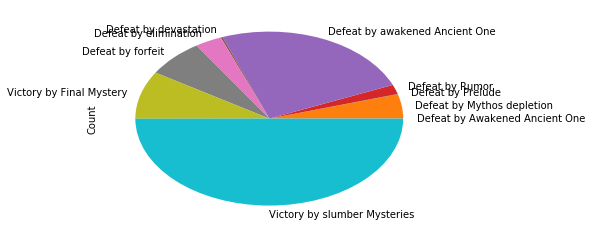

In [27]:
game_results = df.groupby(['Result']).sum()
game_results.columns = ['Count']
# name_dynamics.plot(kind='pie')
game_results.plot(kind='pie', subplots=True, legend=False)
game_results.reset_index().head(20)

# делаем уродливый pie-chart, показывающий доли результатов игр от общего числа всех результатов. Выглядит ужасно.

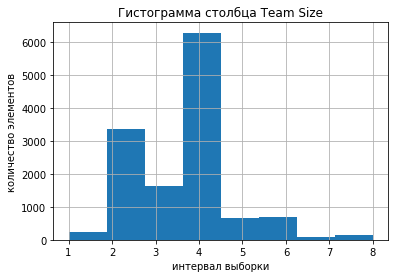

Чаще всего в игре участвует 4 или 2 сыщика


In [38]:
plt.hist(df['Team Size'],8)
plt.xlabel('интервал выборки')
plt.ylabel('количество элементов')
plt.title('Гистограмма столбца Team Size')
plt.grid(True)
plt.show()

print('Чаще всего в игре участвует 4 или 2 сыщика')
# гистограмма показывает распdata:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAY4AAAEWCAYAAABxMXBSAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDIuMi4yLCBodHRwOi8vbWF0cGxvdGxpYi5vcmcvhp/UCwAAIABJREFUeJzt3XucHFWZ//HPFwgmEMiFyywkkQBmESSAMAKKl4lRrgrogoKAgR+Y1UUFzbKAPzUI6MZdLoIraIRAuCwBEYUFFGPIqKDcAkq4uQkQIATCJSEQCJeEZ/+oM9BMemaqZqamuzPf9+vVr+k6farq6Uqnnz7nVJ1SRGBmZpbXWrUOwMzMGosTh5mZFeLEYWZmhThxmJlZIU4cZmZWiBOHWYOSNKDWMVj/5MRh1iAkDZI0RdKDkp4B7q51TPVE0sOSPljrOPoDJ441mKQFklZIWl7x+E6t47JuuwZ4NzAuIjaNiLG9vQNJh1V8VlZIerPy89Pb+ysY20BJ50p6MsXziKQftr0eEVtHxF9qGWN/sU6tA7DSfToifl/rIKxnJLUAI4FPRcSqsvYTEZcDl1fs87KIGFnW/gqaDGwL7Aw8A2wJuIVRA25x9FOSLpZ0esXyjZJC0jppebikiyQtkrRU0q9T+Qvp196rklZV/Bo9LL2+v6T7U71WSdtW7KN9C+jPqfwUSVdLulLSS5LulrRjxXonpW6IlyQ9IOkzFa8dmeL+RkXZvqns9LTckpbPqaizXSq7rKLsF5KelrRM0h8lva+T49frxye93prWbdvGLemlXYHngdtSfHdK+lC79Y6pWP6EpAUVy/tJukfSi5KekHRKR++tK5JGSbpW0nPpV/+XK17bQ9LtKcZFks6u+EwNTMf8y+nf80VJ35a0jaQ70jqXt9Wv4gPALyNicWQeSYmubd9PS/qwpLX1zlb2y2m//5DqfUbSvenf4E+StuvuseivnDis7ZflDu2KLwXWA94HbAqcDRARQyNiMPBl4C8RMTg9Lpf0j8AVwPHAJsCNwP9IWrdiu5+uWOdDFeUHAL8AhgP/Dfxabw/+Pgx8BBgCfA+4TNJmFevOByZULB8DPNju/TwL7CPpXZ3U+Q0wJr3fu0m/vDtQ1vFZCzi2Yhtt1gM+BpwLbAScBdwgaaNOYqz0MvBFYCiwH/AVSQfmXPctktZOcf8Z2BzYG/iWpI+lKm8AXyX7d/wI8GmyY11pPLBjej+TgR8DB5O1IHYF/qmD3d8GnJgST4dJPSJWVRz3wcDPgFnAs5J2B84DjiI7jpeSfdbc+1KAE0c/J0nAfwDfrSjbDNgH+HJELI2INyLiDzk293nghoiYGRFvAGcAg4APdb4aAHMi4uq03lnAQGB3gIj4RUQsiog3I+JKYB7ZF0ybxcACSR+UtCmwBXBHu+2/TvaF99n0Rb0P8OvKChExLSJeiojXgFOAHSUNaR9oycdn3RRrNXdGxKURsTIirgAeIvti7lJEtEbE3HQM7yVLYB/rar0qPgwMjIgfRsTrEfG/wEXAIWk/d0TEnenL+2Hggir7mRIRyyPiHuB/yY7JYxGxBPgd8P4O9v094EdkPxLulrRQ0qGdBSvpi8D+wOdSF98/A/8VEXNSjFOBdwG7FD8U/ZezrH2OrAvk5oqyUcCSiFhacFubA4+1LUTEm5KeAEbkWPeJdustTNtr+8//TWB0qjIY2Ljd+heQ/bL9O3AJ1b98LiD74lkF/JaKL+j0S/r7ZL98NwHeTC9tDCxrt50yj89woNp2X6tcN3mMfMcWSbsBU4DtyZLTu8haeEVtAYyW9EJF2drA79N+tgPOJBuHGET2HXNru20srni+osry4Go7Tsn2HOAcSeuRtcgukXRHSlLvIGnXFMu4lJTa4v+cpBMqqq5LzuNoGbc4+rcBwGnAie3KnwCGSxpacHuLyP5jAm+1ZkYBT+ZYd1TFemuRDQQvkrQF8HOy7o+NImIocB+gduv/BtiD7NfopdV2EBH3kXX5fJssiVT6All32SfIusRGt4VTZVOlHJ/UEtqC7Fd4e49Xrpu8m3zHFrLuv+uAURExBPgp1d9bV54AHkpdcm2PDSKibdzp52TdfFtHxIbAqd3cT6ci4pWIOIssob63/eupVXgNcEz6d6+M/7vt4l8vIq7p7RjXZE4c/dsRwJ9T18VbIuIpsi/i8yQNkzRA0kdzbO8qYD9J49P4xCSy/9h/zrHuLpI+m/qaj0/r3QasDwTZGAWSjiL71fwOqRvih2RnAS1p/3qFHwC/j4j725VvkPb5PFly+UFHGyjj+EgaSNZdOD91/7R3I/CPkr4gaR1Jnwe2A67Psd+297ckIl5Nv8S/kHO99m4BkHR8GuxeR9IOknau2M+yiFiexiG+1M39rEbSJEkfSfsdIGkiWWvnb+3qrQv8CvhZRFzbbjNTga9JalZmsLITFtbrrTj7AyeO/m0Y0NF1HUeQDXQ+RHbq4/FdbSwi/g4cTjbY+RxZ//unI6KjPvtK15KNASxN+/5sGjt4gKy74S9kXRpjWb3ro23/F0XEv3cR4/UR8c0qL11C1vXzJPAAWdLqTG8fn2+TjXUc1MG6S1P9SWTJ7QSyU3Ofq6j2H6nffyHZGMZISW3dUf8CnCrpJbIEdVVX8XYQxxvAvinWx8gS+vm83b30DeAYZdd8/AS4sjv76cBrZCcHLCY75kcBB0bEwnb1tgJ2IxtIrzy7atOIuBX4OtmA+QtkrbsvkP04sZzkGzlZrSk7NfQ9EXF4rWNZk0gaDVwcES21jcTWNG5xmK25VgBzah2ErXl8VpXZGioiFpN1bZn1KndVmZlZIe6qMjOzQtbIrqqNN944Ro8e3e31X375ZdZff/3eC6hEjRQrNFa8jrU8jRRvI8UKPYt3zpw5z0XEJl1WjIg17rHLLrtET8yePbtH6/elRoo1orHidazlaaR4GynWiJ7FC9wVOb5j3VVlZmaFOHGYmVkhThxmZlaIE4eZmRXixGFmZoU4cZiZWSFOHGZmVogTh5mZFeLEYWZmhayRU46YAYw+6YYerT9p7EqO7OE2qlkwZb9e36ZZX3KLw8zMCnHiMDOzQpw4zMysECcOMzMrxInDzMwKKTVxSBoq6WpJD0l6UNIHJQ2XNFPSvPR3WKorSedKmi/pXkk7V2xnQqo/T9KEMmM2M7POld3iOAf4bUS8F9gReBA4CZgVEWOAWWkZYB9gTHpMBM4HkDQcmAzsBuwKTG5LNmZm1vdKSxySNgQ+ClwIEBGvR8QLwAHA9FRtOnBgen4AcEm6EdVtwFBJmwF7ATMjYklELAVmAnuXFbeZmXVO2d0CS9iwtBMwFXiArLUxBzgOeDIihlbUWxoRwyRdD0yJiFtS+SzgRKAFGBgRp6fy7wArIuKMdvubSNZSoampaZcZM2Z0O/bly5czePDgbq/flxopVujbeOc+uaxH6zcNgsUreimYCmNHDOn1bfpzUJ5GihV6Fu+4cePmRERzV/XKvHJ8HWBn4GsRcbukc3i7W6oaVSmLTsrfWRAxlSxR0dzcHC0tLYUDbtPa2kpP1u9LjRQr9G28Pb3qe9LYlZw5t/f/iyw4rKXXt+nPQXkaKVbom3jLHONYCCyMiNvT8tVkiWRx6oIi/X2mov6oivVHAos6KTczsxooLXFExNPAE5K2SUXjybqtrgPazoyaAFybnl8HfDGdXbU7sCwingJuAvaUNCwNiu+ZyszMrAbKnuTwa8DlktYFHgGOIktWV0k6GngcODjVvRHYF5gPvJLqEhFLJJ0G3JnqnRoRS0qO28zMOlBq4oiIvwLVBlrGV6kbwLEdbGcaMK13ozMzs+7wleNmZlaIE4eZmRXixGFmZoU4cZiZWSFOHGZmVogTh5mZFeLEYWZmhThxmJlZIU4cZmZWiBOHmZkV4sRhZmaFOHGYmVkhThxmZlaIE4eZmRXixGFmZoU4cZiZWSFOHGZmVogTh5mZFeLEYWZmhThxmJlZIU4cZmZWiBOHmZkV4sRhZmaFOHGYmVkhpSYOSQskzZX0V0l3pbLhkmZKmpf+DkvlknSupPmS7pW0c8V2JqT68yRNKDNmMzPrXF+0OMZFxE4R0ZyWTwJmRcQYYFZaBtgHGJMeE4HzIUs0wGRgN2BXYHJbsjEzs77XZeKQNEjS9un5IZK+KmnDHuzzAGB6ej4dOLCi/JLI3AYMlbQZsBcwMyKWRMRSYCawdw/2b2ZmPaCI6LyCdBPQBDwNPAO8BLwnIvbqcuPSo8BSIICfRcRUSS9ExNCKOksjYpik64EpEXFLKp8FnAi0AAMj4vRU/h1gRUSc0W5fE8laKjQ1Ne0yY8aMPO+/quXLlzN48OBur9+XGilW6Nt45z65rEfrNw2CxSt6KZgKY0cM6fVt+nNQnkaKFXoW77hx4+ZU9A51aJ0c2xoFbA88EREjACT9LWcce0TEIkmbAjMlPdRJXVUpi07K31kQMRWYCtDc3BwtLS05Q1xda2srPVm/LzVSrNC38R550g09Wn/S2JWcOTfPf5FiFhzW0uvb9OegPI0UK/RNvHnGON4AhgLPSxqWxhxyiYhF6e8zwK/IxigWpy4o0t9nUvWFZEmqzUhgUSflZmZWA3kSxxBgDrABcHfF805JWl/SBm3PgT2B+4DrgLYzoyYA16bn1wFfTGdX7Q4si4ingJuAPVPSGpa2c1PO92dmZr2sy3Z4RIzu5rabgF9JatvPf0fEbyXdCVwl6WjgceDgVP9GYF9gPvAKcFTa/xJJpwF3pnqnRsSSbsZkZmY91GXikDQA+Arw0VTUSjbQ/UZn60XEI8COVcqfB8ZXKQ/g2A62NQ2Y1lWsZmZWvjwjf+cDA4Dz0vIRqeyYsoIyM7P6lSdxfCAiKlsONxc4q8rMzNYweQbHV0naum1B0lbAqvJCMjOzepanxXECMFvSI2TXVGxBGrg2M7P+J89ZVbMkjQG2IUscD0XEa6VHZmZmdSnPWVV3R8TOwL19EI+ZmdW5PGMc1ab8MDOzfirPGMc2kipbGyK77GKHkmIyM7M6lidxPAp8uuxAzMysMeRJHK9HxGOlR2JmZg0hzxjH10qPwszMGkaeFsd4SR9vXxgRp5YQj5mZ1bk8LY7lwMvAl9LftoeZmfVDeS4APBNA0uFtz83MrP/K0+Jo0/nNyc3MrF/Ic+X4/5Alja0kXddWHhH7lxmYmZnVpzyD42ekv+6mMjOzXGMcf5C0BTAmIn4vaT1g7fJDMzOzetTlGIekLwFXAz9LRSOAX5cZlJmZ1a88g+PHAnsALwJExDxg0zKDMjOz+pUncbwWEa+3LUhaB59hZWbWb+VJHH+Q9C1gkKRPAr8A/qfcsMzMrF7lSRwnAc8Cc4F/Bm4Evl1mUGZmVr/ynFX1JvDz9DAzs34uz1lVj0p6pOLxqKRH8u5A0tqS7pF0fVreUtLtkuZJulLSuqn8XWl5fnp9dMU2Tk7lf5e0V/G3aWZmvSVPV9UdwOPAFLKzq5qBDxTYx3HAgxXLPwTOjogxwFLg6FR+NLA0It4DnJ3qIWk74BDgfcDewHmSfB2JmVmNdJk4IuLzwGeAAcBFwFcj4vk8G5c0EtgPuCAtC/g42XUhANOBA9PzA9Iy6fXxqf4BwIyIeC0iHgXmA7vm2b+ZmfW+PFOOALxJ907B/RHwb8AGaXkj4IWIWJmWF5JdUEj6+wRARKyUtCzVHwHcVrHNynXeImkiMBGgqamJ1tbWboSbWb58eY/W70uNFCv0bbyTxq7sulInmgb1fBvVlPH+/TkoTyPFCn0Tb55JDi8HNgeuAI4EXpc0PCKWdLHep4BnImKOpJa24ipVo4vXOlvn7YKIqcBUgObm5mhpaWlfJbfW1lZ6sn5faqRYoW/jPfKkG3q0/qSxKzlzbt7fVvktOKyl17fpz0F5GilW6Jt48/yv2IPsi/pkslNzlZa3yrHe/pL2BQYCG5K1QIZKWie1OkYCi1L9hcAoYGG6yHAIsKSivE3lOmZm1sfyjHGMjogt02Ortr851js5IkZGxGiywe2bI+IwYDZwUKo2Abg2Pb8uLZNevzkiIpUfks662hIYQzZgb2ZmNZDndNz1JH1b0tS0PCZ1Q3XXicA3Jc0nG8O4MJVfCGyUyr9J1rohIu4HrgIeAH4LHBsRq3qwfzMz64E8XVUXAXOAD6XlhWTTjlyfdycR0Qq0puePUOWsqIh4FTi4g/W/D3w/7/7MzKw8ea7j2Doi/gN4AyAiVlB9wNrMzPqBPInjdUmDSGcySdoaeK3UqMzMrG7l6aqaTDa2MCqdmrsH2Wm5ZmbWD+WZ5HCmpLuB3cm6qI6LiOdKj8zMzOpSngsAP9uu6KOSiIhrSorJzMzqWJ6uqp+TXUtRKQAnDjOzfihP4ng8Io4qPRIzM2sIeRLHCEk/Al4lm+rj1oiYU25YZmZWr/KcjnsCcC/ZzLVNwDRJJ5UalZmZ1a08Z1VNr1yWdDrZfcenlBWUmZnVr9xzRksaAURELALGlReSmZnVszyTHG4r6Xbg78Ctku5Lt3M1M7N+KM8Yx7nA4cC8iNgS+BbphklmZtb/5EkcwyJiXttCRFwHDC4vJDMzq2d5EscbktYCpgFIGkKaKdfMzPqfPIPjnyYbFP9xWn4N2Lu8kKwjo6vcQ3vS2JU9vrd2Ty2Ysl9N929mfSvP6bjPtVt+lexiQDMz64fydFWZmZm9xYnDzMwKyTOt+gDgK8BHU9EfgJ9GhAfIzcz6oTyD4+cDA4Dz0vIRqeyYsoIyM7P6lSdxfCAidqxYvlnS38oKyMzM6lueMY5VkrZuW5C0FbCqvJDMzKye5WlxnADMlvQI2T3HtwB8Yyczs36qyxZHRMwCxgBfT49tImJ2V+tJGijpDkl/k3S/pO+l8i0l3S5pnqQrJa2byt+Vluen10dXbOvkVP53SXt1762amVlvyDM77j8AnwT+F9gX+L6kLXJs+zXg42l8ZCdgb0m7Az8Ezo6IMcBS4OhU/2hgaUS8Bzg71SPNxHsI8D6yK9bPk7R2/rdoZma9Kc8YxzXAROA2YD1gMfDfXa0UmeVpcUB6BPBx4OpUPh04MD0/IC2TXh8vSal8RkS8FhGPAvOBXXPEbWZmJVBEdF5Bui8itpf0aJpWHUn3RMT7u9x41jKYA7wH+Anwn8BtqVWBpFHAb9L27wP2joiF6bWHgd2AU9I6l6XyC9M6V7fb10SyBEdTU9MuM2bMyHsMVrN8+XIGD66/CYDnPrlstbKmQbB4RQ2CqTB2xJDcdfvy2FY7XkWUdWyLHK+86vUz25FGireRYoWexTtu3Lg5EdHcVb08g+NrS9oZeE3S+8laKQPzBBERq4CdJA0FfgVsW61a+qsOXuuovP2+ppLuE9Lc3BwtLS15QqyqtbWVnqxflmqTGU4au5Iz5+a+kWMpFhzWkrtuXx7bnk7+WNaxLXK88qrXz2xHGineRooV+ibePP8rFgNnAk8BZ6Wyp4vsJCJekNQK7A4MlbRORKwERgKLUrWFwChgoaR1gCHAkoryNpXrmJlZH8szxnFIRIxr/+hqJUmbpJYGkgYBnwAeBGYDB6VqE4Br0/Pr0jLp9Zsj60e7DjgknXW1JdkZXnfkfH9mZtbL8rQ4bgR27sa2NwOmp3GOtYCrIuJ6SQ8AMySdDtwDXJjqXwhcKmk+WUvjEICIuF/SVcADwErg2NQFZmZmNVBa53hE3AusNoAeEY9Q5ayodJ+PgzvY1veB7/d2jGZmVlyexLGDpBcrlkV2tu2GJcVkZmZ1LE/imJvn1FszM+sffCMnMzMrJE/i+KfSozAzs4aRJ3FMbjutFkDSMEnTSozJzMzqWJ7EsUNEvNC2EBFLqXK2lJmZ9Q95Esdakoa1LUgaTomn8ZqZWX3LkwDOBP4s6WqyOaI+h6+pMDPrt7pMHBFxiaS7yKZDF/DZiHig9MjMzKwu5T0ddzjwckT8GHg2zRllZmb9UJ47AE4GTgROTkUDgMvKDMrMzOpXnhbHZ4D9gZcBImIRsEGZQZmZWf3KkzheT9ObB4Ck9csNyczM6lmexHGVpJ+R3YDpS8DvgZ+XG5aZmdWrPGdVnSHpk8CLwDbAdyNiZumRmZlZXcp1IV9KFE4WZmbWdeKQ9BJpfKOtCN+Pw8ys3+pyjCMiNoiIDVOieLhtuQ9iMzOzOlT0fhyeo8rMrJ/L01X14/R0R+D2csMxM7N6l6cFcRfwJnAN0FpqNGZmVvfynI47vS8CMTOzxlD0rCqlvz6rysysn8ozOH4OcB9waDqjymdVmZn1Y3lOx/02cACwl6RZkvbIs2FJoyTNlvSgpPslHZfKh0uaKWle+jsslUvSuZLmS7pX0s4V25qQ6s+TNKF7b9XMzHpDnmnVdwZGARcD5wHnSbo+x7ZXApMiYltgd+BYSdsBJwGzImIMMCstA+wDjEmPicD5af/DgcnAbsCuwOTKW9mamVnfynvr2EpLgC5nyI2Ip4Cn0vOXJD0IjCBrvbSkatPJztQ6MZVfkmbivU3SUEmbpbozI2IJgKSZwN7AFTliNzOzXqbse7rknUijgT8C2wOPR8TQiteWRsSw1IqZEhG3pPJZZAmlBRgYEaen8u8AKyLijHb7mEjWUqGpqWmXGTNmdDve5cuXM3jw4G6vX5a5Ty5braxpECxeUYNgKowdMSR33b48ttWOVxFlHdsixyuvev3MdqSR4m2kWKFn8Y4bN25ORDR3VS/PWVXnViuPiK/nCUTSYOCXwPER8aKkDqtW200n5e3jmQpMBWhubo6WlpY84VXV2tpKT9Yvy5En3bBa2aSxKzlzbm0v6F9wWEvuun15bKsdryLKOrZFjlde9fqZ7UgjxdtIsULfxJvnf8UBwHe7s3FJA8iSxuURcU0qXixps4h4KnVFPZPKF5KNpbQZCSxK5S3tylu7E4+ZmfVcnsTxfHcuAlTWtLgQeDAizqp46TpgAjAl/b22ovyrkmaQDYQvS8nlJuAHFQPie/L2/c/NzKyP5Ukc75X0V+BVshbArcBPIuLVLtbbAzgCmJvWB/gWWcK4StLRwOPAwem1G4F9gfnAK8BRABGxRNJpwJ2p3qltA+VmZtb38iSObYG1gUHA5mRf9BcAh3e2Uhrk7mhAY3yV+gEc28G2pgHTcsRqZmYlyzNX1WMVi/cDMyX9sLyQzMysnuU6ZUTSjsBH0uKfIuLE8kIyM7N6lufK8eOAy4FN0+MySV8rOzAzM6tPeVocRwO7RcTLAKmb6i/Ajztdy8zM1kh5ZscVsKpieRUdD3qbmdkaLk+L4yLgdkm/SssH4jOczMz6rTxnVZ0lqRX4MFlL46iIuKfswKxxjC4wtceksSt7PBWImdVWnrmqRkTE3cDdFWVfjoiflhqZmZnVpTxjHDdIei+ApG0k/QHYqdywzMysXuUZ4zgUmCFpNjAO+HpE/LHcsMzMrF7luXXsg2RzSH2c7H4ZThpmZv1YngsA5wK/BTYELk33A7+39MjMzKwu5emq+lTpUZiZWcMoOsmhmZn1c3nOqjIzM3uLE4eZmRXixGFmZoU4cZiZWSFOHGZmVogTh5mZFeLEYWZmhThxmJlZIU4cZmZWiBOHmZkVUlrikDRN0jOS7qsoGy5ppqR56e+wVC5J50qanyZR3LlinQmp/jxJE8qK18zM8imzxXExsHe7spOAWRExBpiVlgH2Acakx0TgfMgSDTAZ2A3YFZjclmzMzKw2Sksc6b4dS9oVHwBMT8+nAwdWlF8SmduAoZI2A/YCZkbEkohYCsxk9WRkZmZ9SBFR3sal0cD1EbF9Wn4hIoZWvL40IoZJup7sJlG3pPJZwIlACzAwIk5P5d8BVkTEGVX2NZGstUJTU9MuM2bM6Hbcy5cvZ/Dgwd1evyxzn1y2WlnTIFi8ogbBdFMjxVtWrGNHDOn1bdbrZ7YjjRRvI8UKPYt33LhxcyKiuat6ee7H0RdUpSw6KV+9MGIqMBWgubk5Wlpauh1Ma2srPVm/LEeedMNqZZPGruTMufXyz9i1Roq3rFgXHNbS69us189sRxop3kaKFfom3r4+q2px6oIi/X0mlS8ERlXUGwks6qTczMxqpK8Tx3VA25lRE4BrK8q/mM6u2h1YFhFPATcBe0oalgbF90xlZmZWI6X1GUi6gmyMYmNJC8nOjpoCXCXpaOBx4OBU/UZgX2A+8ApwFEBELJF0GnBnqndqRLQfcDczsz5UWuKIiEM7eGl8lboBHNvBdqYB03oxNDMz6wFfOW5mZoU4cZiZWSFOHGZmVogTh5mZFdIYV2KZWelGV7nAtCyTxq6sekFrNQum7FdyNFaUE4dZHyvjC7rIF7FZT7mryszMCnHiMDOzQpw4zMysECcOMzMrxInDzMwKceIwM7NCnDjMzKwQJw4zMyvEicPMzApx4jAzs0KcOMzMrBAnDjMzK8SJw8zMCvHsuFXMfXKZZxo1M+uAWxxmZlaIE4eZmRXiriozs27oyzsmFnHx3uuXvg+3OMzMrJCGaXFI2hs4B1gbuCAiptQ4JDPrA7X+Ze/b8q6uIVocktYGfgLsA2wHHCppu9pGZWbWPzVE4gB2BeZHxCMR8TowAzigxjGZmfVLiohax9AlSQcBe0fEMWn5CGC3iPhqRZ2JwMS0uA3w9x7scmPguR6s35caKVZorHgda3kaKd5GihV6Fu8WEbFJV5UaZYxDVcrekfEiYiowtVd2Jt0VEc29sa2yNVKs0FjxOtbyNFK8jRQr9E28jdJVtRAYVbE8ElhUo1jMzPq1RkkcdwJjJG0paV3gEOC6GsdkZtYvNURXVUSslPRV4Cay03GnRcT9Je6yV7q8+kgjxQqNFa9jLU8jxdtIsUIfxNsQg+NmZlY/GqWryszM6oQTh5mZFeLEkUiaJukZSffVOpY8JI2SNFvSg5Lul3RcrWPqiKSBku6Q9LcU6/dqHVNXJK0t6R5J19c6lq5IWiBprqS/Srqr1vF0RdJQSVdLeih9fj9Y65iqkbRNOqZtjxclHV/ruDoi6Rvp/9d9kq6QNLC0fXmMIyPpo8By4JKI2L7W8XRF0mbAZhFxt6QNgDnAgRHxQI1DW40kAetHxHJJA4BbgOMi4rYah9YhSd8EmoENI+JTtY6nM5IWAM0R0RAXqUmaDvxOjAsxAAAGJ0lEQVQpIi5IZ0muFxEv1DquzqRpj54ku/D4sVrH056kEWT/r7aLiBWSrgJujIiLy9ifWxxJRPwRWFLrOPKKiKci4u70/CXgQWBEbaOqLjLL0+KA9KjbXyySRgL7ARfUOpY1jaQNgY8CFwJExOv1njSS8cDD9Zg0KqwDDJK0DrAeJV7r5sSxBpA0Gng/cHttI+lY6vr5K/AMMDMi6jZW4EfAvwFv1jqQnAL4naQ5aeqderYV8CxwUeoKvEBS+TeQ6LlDgCtqHURHIuJJ4AzgceApYFlE/K6s/TlxNDhJg4FfAsdHxIu1jqcjEbEqInYiu+p/V0l12R0o6VPAMxExp9axFLBHROxMNnv0sanbtV6tA+wMnB8R7wdeBk6qbUidS91p+wO/qHUsHZE0jGzi1y2BzYH1JR1e1v6cOBpYGi/4JXB5RFxT63jySN0SrcDeNQ6lI3sA+6dxgxnAxyVdVtuQOhcRi9LfZ4Bfkc0mXa8WAgsrWpxXkyWSerYPcHdELK51IJ34BPBoRDwbEW8A1wAfKmtnThwNKg04Xwg8GBFn1TqezkjaRNLQ9HwQ2Yf8odpGVV1EnBwRIyNiNFn3xM0RUdovt56StH46OYLU5bMnULdnBkbE08ATkrZJReOBujuho51DqeNuquRxYHdJ66XvhvFk456lcOJIJF0B/AXYRtJCSUfXOqYu7AEcQfaLuO10wX1rHVQHNgNmS7qXbN6xmRFR96e5Nogm4BZJfwPuAG6IiN/WOKaufA24PH0edgJ+UON4OiRpPeCTZL/g61ZqwV0N3A3MJftuL23qEZ+Oa2ZmhbjFYWZmhThxmJlZIU4cZmZWiBOHmZkV4sRhZmaFOHGYNTBJx0j6k6S7JE2udTzWPzTErWPNbHXpWqPdgU9FxLJax2P9h1sc1lAkjW67Z4qkAZIekfRfafliSQdV1L0v1f/PdIHk05KeTM9PTXVOkHSnpHvb7hOS1nlI0vRUfnW6EKzy3hcPSfpd2wR9ks5Pv/pXu99IxToPqMr9XiQdKenZdL+S+ZIOTeWnSPrXdnUPknRxWpwIjCK7APA2STukOsMl/TrFXll+iqRLJd0saZ6kL6XyFqX7jkj6mKTbJQ1pVz5c0rL28Vj/5MRhjWwi2T1UOhURJ6QJFn8KnB0RO0XEdyXtCYwhm9tpJ2CXigkCtwGmRsQOwIvAv1RschzwPrKrtrdOZf8/IpqBHYCPtX1ZJ2sDHwM6u7L/yojYETgZOLir95RsCvw5IsYC3wIuSeXfA+5JsVeWk+LbD/gg8F1Jm7e9IGkscA7wmSotmJOBep5S3PqQE4c1pNQCOAo4v91Lba2Lv/L2l3pH9kyPe8imangvWSIBeCIibk3PLwM+XLHebOAJYDHZ9A4An5N0d9rW+4DtKuoPAl7tIpbPpyk4Lmz3nr6R3s+tknZvt46ASwEi4mZgI0lDUqzVygGujYgV6aZPs3l7QsTNgd8A09smTXxrJ9lNgnYnm0DRzInDGtbxZHPxrGhXfkJqUewEPNzFNgT8e1v9iHhPRFyYXms/F0/l8jiym2YtBg6VtCXwr8D49Cv/BmAgZLfNBdaKiFe6iOXKtO4uwH9VlJ+d3stkoP1kltWm0Y/0vqqVd/a+3kvWqvpnSZu0qzMZOK3KutZPOXFYIxoCHAhM6+F2bgL+X7qnCZJGSNo0vfZuvX0v7EPJbsv5lsgmeXsJ2BjYkOy+EsskNZFNw93mILLJM/N6CdioSvnzwLrtym4HDkuxtwDPpXuy/LGDcoADlN0DfiOghWzSSchmAb6ObMLBcyr2sTUwusybAlnj8VlV1ohGAv8aESuzGaS7JyJ+J2lb4C9pO8uBw4FVZFNST5D0M2Ae7+w+mi0pyFoc34qIFyTdA9wPPALcCiDpM8BXgCNzhPN5SR8G3gVMqig/VtKBZLcCPRnYoOK17wAXpy6ul4EJqfwUsjvs3Qu8UlEOaQZd4N3AaRGxSNI/VhyTSyQdlmZafoWsJXJUjvitH/HsuGbtKLsV7/URUZd3KewuSacAyyPijFrHYo3NXVVmZlaIWxxmZlaIWxxmZlaIE4eZmRXixGFmZoU4cZiZWSFOHGZmVsj/AQ18JHBJsryYAAAAAElFTkSuQmCCределение частоты размера партии сыщиков во все играх

In [2]:
db = pd.read_csv(
    'tmdb_5000_movies.csv')
db.head(5)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [3]:
db_barh = db[db['vote_count']>1000].sort_values('vote_average', ascending=False).head(15)
db_barh

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
1881,25000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 80, ""name...",NaN,278,"[{""id"": 378, ""name"": ""prison""}, {""id"": 417, ""n...",en,The Shawshank Redemption,Framed in the 1940s for the double murder of h...,136.747729,"[{""name"": ""Castle Rock Entertainment"", ""id"": 97}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1994-09-23,28341469,142.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Fear can hold you prisoner. Hope can set you f...,The Shawshank Redemption,8.5,8205
3337,6000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 80, ""name...",http://www.thegodfather.com/,238,"[{""id"": 131, ""name"": ""italy""}, {""id"": 699, ""na...",en,The Godfather,"Spanning the years 1945 to 1955, a chronicle o...",143.659698,"[{""name"": ""Paramount Pictures"", ""id"": 4}, {""na...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1972-03-14,245066411,175.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,An offer you can't refuse.,The Godfather,8.4,5893
3232,8000000,"[{""id"": 53, ""name"": ""Thriller""}, {""id"": 80, ""n...",NaN,680,"[{""id"": 396, ""name"": ""transporter""}, {""id"": 14...",en,Pulp Fiction,"A burger-loving hit man, his philosophical par...",121.463076,"[{""name"": ""Miramax Films"", ""id"": 14}, {""name"":...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1994-10-08,213928762,154.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Just because you are a character doesn't mean ...,Pulp Fiction,8.3,8428
2731,13000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 80, ""name...",NaN,240,"[{""id"": 700, ""name"": ""italo-american""}, {""id"":...",en,The Godfather: Part II,In the continuing saga of the Corleone crime f...,105.792936,"[{""name"": ""Paramount Pictures"", ""id"": 4}, {""na...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1974-12-20,47542841,200.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,"I don't feel I have to wipe everybody out, Tom...",The Godfather: Part II,8.3,3338
2294,15000000,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 12, ""na...",http://movies.disney.com/spirited-away,129,"[{""id"": 616, ""name"": ""witch""}, {""id"": 970, ""na...",ja,千と千尋の神隠し,A ten year old girl who wanders away from her ...,118.968562,"[{""name"": ""Studio Ghibli"", ""id"": 10342}]","[{""iso_3166_1"": ""JP"", ""name"": ""Japan""}]",2001-07-20,274925095,125.0,"[{""iso_639_1"": ""ja"", ""name"": ""\u65e5\u672c\u8a...",Released,The tunnel led Chihiro to a mysterious town...,Spirited Away,8.3,3840
1818,22000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 36, ""name...",http://www.schindlerslist.com/,424,"[{""id"": 1382, ""name"": ""factory""}, {""id"": 1631,...",en,Schindler's List,The true story of how businessman Oskar Schind...,104.469351,"[{""name"": ""Universal Pictures"", ""id"": 33}, {""n...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1993-11-29,321365567,195.0,"[{""iso_639_1"": ""de"", ""name"": ""Deutsch""}, {""iso...",Released,"Whoever saves one life, saves the world entire.",Schindler's List,8.3,4329
3865,3300000,"[{""id"": 18, ""name"": ""Drama""}]",http://sonyclassics.com/whiplash/,244786,"[{""id"": 1416, ""name"": ""jazz""}, {""id"": 1523, ""n...",en,Whiplash,"Under the direction of a ruthless instructor, ...",192.528841,"[{""name"": ""Bold Films"", ""id"": 2266}, {""name"": ...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2014-10-10,13092000,105.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The road to greatness can take you to the edge.,Whiplash,8.3,4254
662,63000000,"[{""id"": 18, ""name"": ""Drama""}]",http://www.foxmovies.com/movies/fight-club,550,"[{""id"": 825, ""name"": ""support group""}, {""id""

Text(0.5,1,'Top 15 best films')

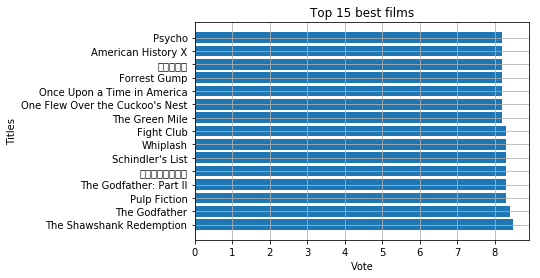

In [4]:
plt.barh(db_barh['original_title'], db_barh['vote_average'])
plt.grid()
plt.xlabel('Vote')
plt.ylabel('Titles')
plt.title('Top 15 best films')

In [6]:
db1 = db[['budget'] + ['release_date']]\
    .groupby('release_date').sum()
db1.head()

,budget
release_date,
1916-09-04,385907
1925-11-05,245000
1927-01-10,92620000
1929-01-30,0
1929-02-08,379000


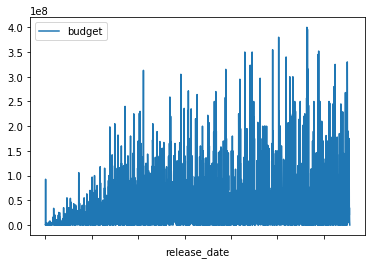

In [7]:
db1.plot()

ValueError: max must be larger than min in range parameter.

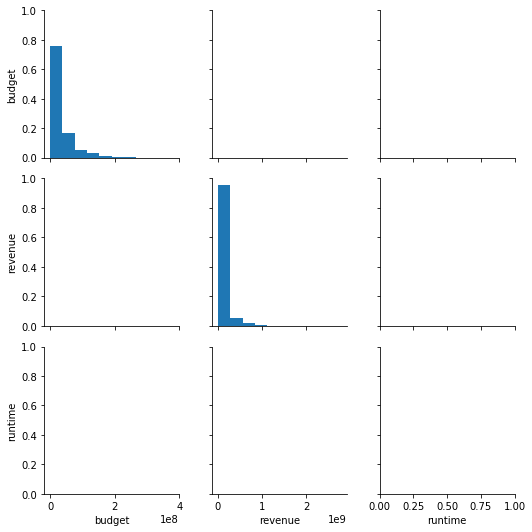

In [8]:
import seaborn as sns
sns_plot = sns.pairplot(
    db[['budget', 'revenue', 'runtime']])
sns_plot

D:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


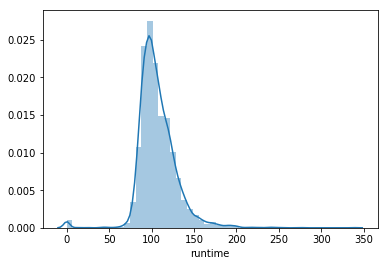

In [10]:
sns.distplot(db.runtime.dropna())